📌 First 5 Rows of the Dataset:
╒════╤═════════════════╤════════════════════════╤════════════════╤══════════════════╤═════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════╤══════════════════════════════════════════════════════════════╤═════════════╤════════════╤══════════════════════════════════╤════════════════════════╤══════════════════╤═════════════════════╤═══════════════════════╤═════════════════════╤════════════════════════╤═══════════════╤════════════════════╤════════════════╤═══════════════╤═════════╕
│    │   Restaurant ID │ Restaurant Name        │   Country Code │ City             │ Address                                                                 │ Locality                                   │ Locality Verbose                                             │   Longitude │   Latitude │ Cuisines                         │   Average Cost for two │ Currency         │ Has Table booking   │ Has Online delivery   │ Is

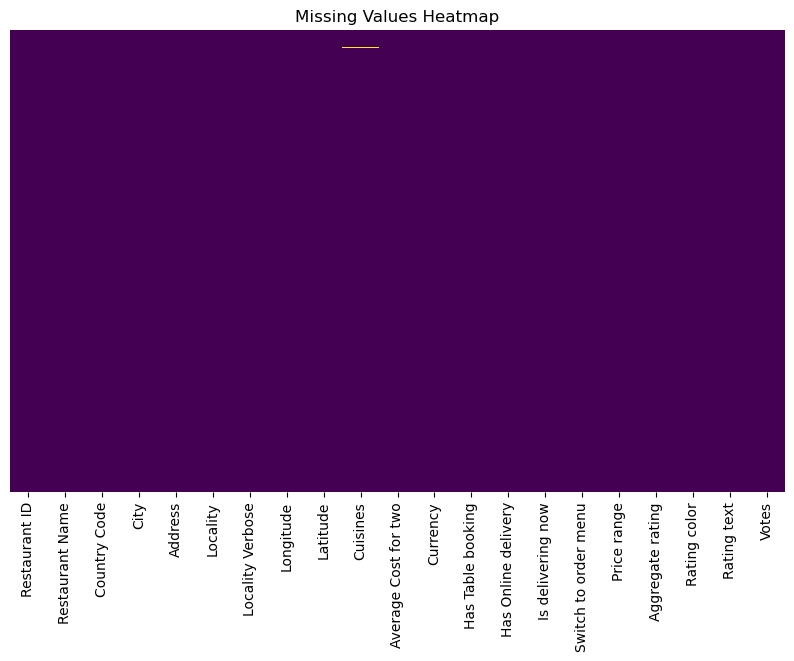


📌 First 10 Rows After Data Cleaning:
╒════╤═════════════════╤══════════════════════════════════════════╤════════════════╤══════════════════╤═════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════╤═════════════╤════════════╤════════════════════════════════════╤════════════════════════╤══════════════════╤═════════════════════╤═══════════════════════╤═════════════════════╤════════════════════════╤═══════════════╤════════════════════╤════════════════╤═══════════════╤═════════╕
│    │   Restaurant ID │ Restaurant Name                          │   Country Code │ City             │ Address                                                                             │ Locality                                        │ Locality Verbose                                             │   Longitude │   Latitude │ Cuisines                           │   Average C

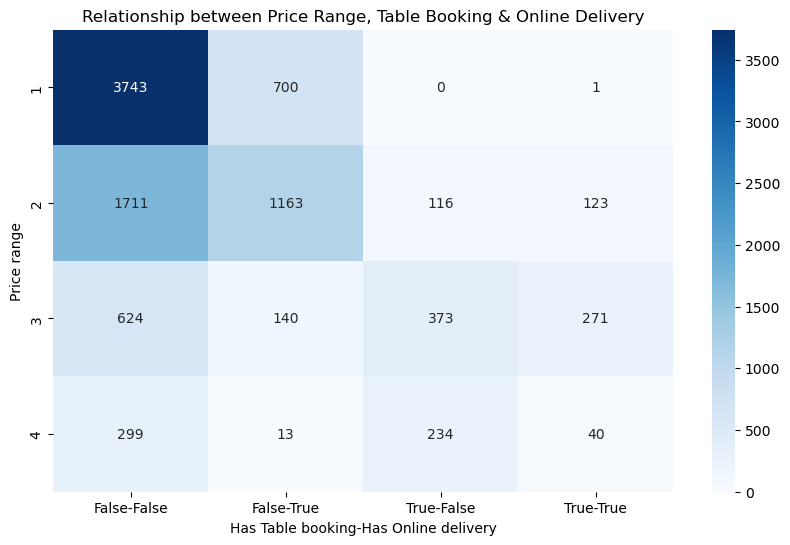

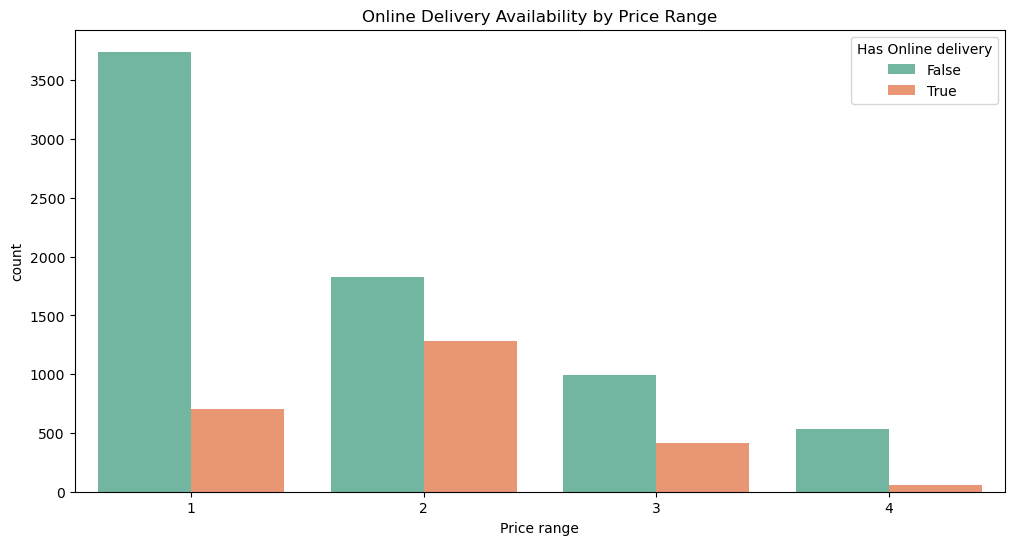

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8300\563194379.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price range', y='Votes', hue='Has Table booking', data=data, ci=None, palette='coolwarm')


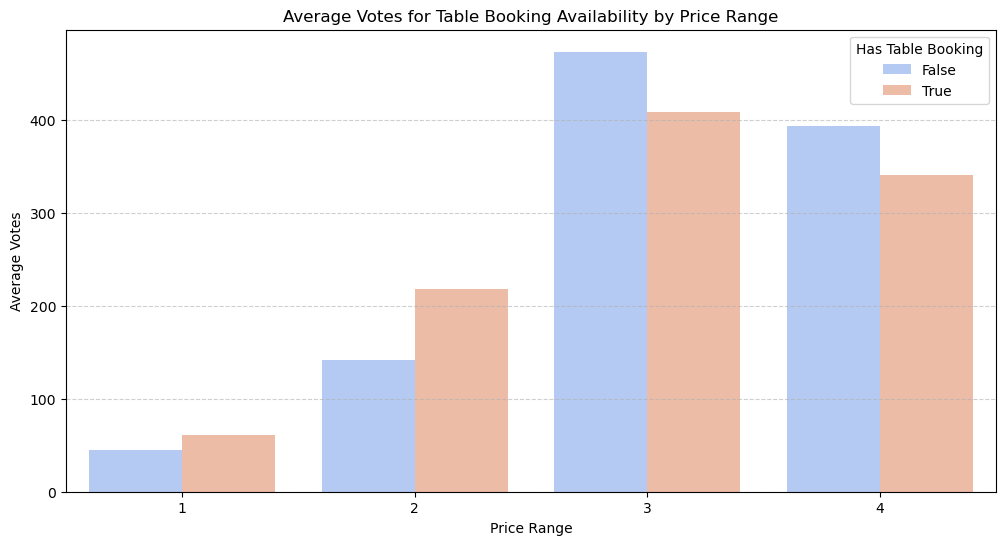

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load dataset
file_path = "/mnt/data/Dataset .csv"  # Ensure correct path
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Dataset .csv")

# Display first 5 rows
print("📌 First 5 Rows of the Dataset:")
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

# Display dataset information
print("\n📝 Dataset Information:")
print(data.info())

# Check for missing values
print("\n🔍 Missing Values in Each Column:")
print(tabulate(data.isnull().sum().reset_index(), headers=["Column", "Missing Values"], tablefmt="fancy_grid"))

# Display summary statistics
print("\n📈 Summary Statistics:")
print(tabulate(data.describe(), headers='keys', tablefmt='fancy_grid'))

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Clean the dataset by dropping NaN values in key columns
data.dropna(subset=['Price range', 'Has Table booking', 'Has Online delivery'], inplace=True)

# Map categorical values to boolean
data['Has Table booking'] = data['Has Table booking'].map({'Yes': True, 'No': False})
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': True, 'No': False})

# Display cleaned data
print("\n📌 First 10 Rows After Data Cleaning:")
print(tabulate(data.head(10), headers='keys', tablefmt='fancy_grid'))

# Heatmap: Price Range vs Online Delivery & Table Booking
plt.figure(figsize=(10, 6))
heatmap = pd.crosstab(data['Price range'], [data['Has Table booking'], data['Has Online delivery']])
sns.heatmap(heatmap, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Relationship between Price Range, Table Booking & Online Delivery')
plt.show()

# Count Plot: Online Delivery Availability by Price Range
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=data, palette='Set2')
plt.title('Online Delivery Availability by Price Range')
plt.show()

# Bar Plot: Average Votes for Table Booking Availability
plt.figure(figsize=(12, 6))
sns.barplot(x='Price range', y='Votes', hue='Has Table booking', data=data, ci=None, palette='coolwarm')
plt.title('Average Votes for Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Votes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Has Table Booking')
plt.show()
